In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datasets import DatasetDict, Dataset, load_dataset
from transformers import AutoTokenizer

In [4]:
text_datasets = {
  "train": ['data/combined_facts.txt'],
}
dataset = load_dataset("text", data_files=text_datasets)

tokenizer = AutoTokenizer.from_pretrained("roberta-base")
tokenized_dataset = dataset.map(
    lambda z: tokenizer(z["text"]),
    num_proc=2,
    batched=True,
    remove_columns=["text"],
)

Generating train split: 11077 examples [00:00, 747587.26 examples/s]
tokenizer_config.json: 100%|██████████| 25.0/25.0 [00:00<00:00, 115kB/s]
config.json: 100%|██████████| 481/481 [00:00<00:00, 2.34MB/s]
vocab.json: 100%|██████████| 899k/899k [00:00<00:00, 10.8MB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 3.01MB/s]
tokenizer.json: 100%|██████████| 1.36M/1.36M [00:00<00:00, 4.24MB/s]
Map (num_proc=2): 100%|██████████| 11077/11077 [00:00<00:00, 22789.09 examples/s]


In [10]:
tokenized_dataset['train']['input_ids'][:4]

[[0, 627, 3778, 16, 5, 1300, 9, 1007, 13, 2166, 16726, 15, 3875, 2],
 [0, 281, 4472, 7, 41, 7626, 3488, 2156, 14, 7626, 40, 2082, 2735, 2],
 [0, 20098, 990, 1499, 16, 77, 9377, 10395, 6383, 159, 689, 2],
 [0, 102, 999, 16, 156, 9, 20038, 2]]

Total # of lines: 11077
Min Length: 5
Max Length: 89
Median Length: 14.0


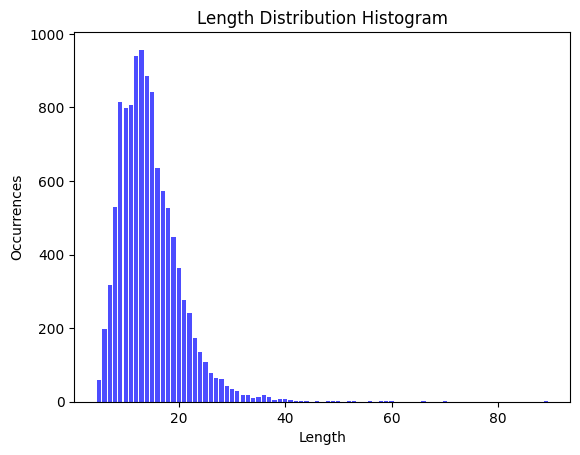

In [11]:
seqlens = [len(seq) for seq in tokenized_dataset['train']['input_ids']]
median = np.median(seqlens)
lensdist = Counter(seqlens)

print(f"Total # of lines: {len(seqlens)}")
print(f"Min Length: {min(seqlens)}")
print(f"Max Length: {max(seqlens)}")
print(f"Median Length: {median}")
values, counts = zip(*lensdist.items())

plt.bar(values, counts, color='blue', alpha=0.7)
plt.xlabel('Length')
plt.ylabel('Occurrences')
plt.title('Length Distribution Histogram')
plt.show()